# Simple Regression Using StatsModels

In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
### Simulation parameters
number = 22

constant = 5.
coeff = .8
eCoeff = 5.1

### Trivial x-axis starting at 1
np.random.seed(29)
X = np.arange(0, number) + 1.
error = eCoeff * np.random.random(number)

### Compute Y-Values
Y = np.dot(X, coeff)
Y += error
Y += Y + constant

### Create a dataframe
df = pd.DataFrame(Y, X, columns=["Y_Values"])
df.index.name = "X_Values"
df.head()

,Y_Values
X_Values,
1.0,15.410352
2.0,11.106041
3.0,10.547215
4.0,19.185019
5.0,17.617734


## Linear Regression

In [10]:
X = sm.add_constant(X) 

model = sm.OLS(Y, X).fit()
# print(model.params)

print("Truth model:\t\t y = ", constant, " + ", coeff, " * x" )
print("Estimated model:\t y = ", round(model.params[0],1), " + ", round(model.params[1],1), " * x", "| R2", round(model.rsquared,3), "\n" )
#print(model.summary())

### Predictions
df["YP"] = model.predict(X)

Truth model:		 y =  5.0  +  0.8  * x
Estimated model:	 y =  10.5  +  1.6  * x | R2 0.924 



## Two plots: Scatter + Line

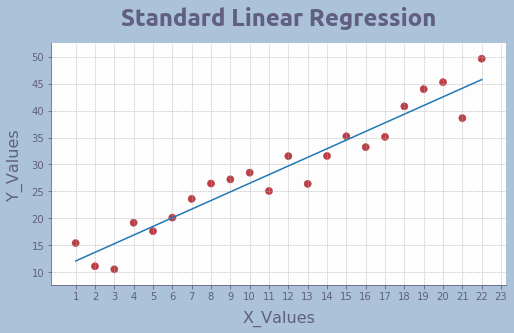

In [11]:
### Create the figure and the graph (=axis) with the figure
fig, ax = plt.subplots(figsize=(8, 5))

### Colors and spacings
fig.set_facecolor('xkcd:cloudy blue')
ax.set_facecolor('xkcd:pale grey')
plt.subplots_adjust(left=0.12, right=0.91, top=0.82, bottom=0.15)
ax.xaxis.grid(linestyle="--", linewidth=0.5)
ax.yaxis.grid(linestyle="--", linewidth=0.5)

### Set title and configure axis
myColor1 = "#605f82"
ax.set_title("Standard Linear Regression", \
     fontsize=24, fontweight=800, pad = 18, color=myColor1, fontfamily="Ubuntu")
ax.set_xlabel(xlabel = df.index.name, fontsize=16, color=myColor1, labelpad = 8)
ax.set_ylabel(ylabel = df.columns.values[0], fontsize=16, color=myColor1, labelpad = 8)

### Range of x/y-axis
ax.set_xticks(np.arange(1, number+2, 1))
ax.set_yticks(np.arange(round(min(Y)*0.9,-1), max(Y)*1.1, 5))

### Beautifications
ax.tick_params(axis='x', colors=myColor1, rotation=0)
ax.tick_params(axis='y', colors=myColor1)

ax.spines['bottom'].set_color(myColor1)
ax.spines['left'].set_color(myColor1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### Scatterplot for data points
sns.scatterplot(ax = ax, data=df.loc[:,:"Y_Values"], palette=["#bd3d44"], marker="x", s=50, legend=False)

### Lineplot for model
sns.lineplot(ax = ax, data=df["YP"], legend=False)